# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [153]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [154]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [155]:
df.info()
#As in data frame info we can see the data column are define as object so we need to tycast to date data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [156]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')

In [157]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [158]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [159]:
# Convert categorical features to category type
# df['store_primary_category'] = df['store_primary_category'].astype('category')
# df['order_protocol'] = df['order_protocol'].astype('category')
df['martket_id'] = df['market_id'].astype('int64')
df['order_protocol'] = df['order_protocol'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [160]:
# Calculate time taken in minutes
df['Time Taken'] = df['actual_delivery_time'] - df['created_at']
df['Time Taken in minutes'] = df['Time Taken'].dt.total_seconds() / 60
df.drop(columns='Time Taken', inplace = True)
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,martket_id,Time Taken in minutes
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33.0,14.0,21.0,34.44,1,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,2,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3,4,4771,3,820,1604,8.0,6.0,18.0,11.56,2,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,1,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,1,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [161]:
# Extract the hour and day of week from the 'created_at' timestamp
df['Hour of the day'] = df['created_at'].dt.hour
df['Day of week'] = df['created_at'].dt.weekday

# Create a categorical feature 'isWeekend'
df['iswekend'] = df['Day of week'].apply(lambda x: 1 if x in [5,6] else 0)
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,martket_id,Time Taken in minutes,Hour of the day,Day of week,iswekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33.0,14.0,21.0,34.44,1,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,2,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3,4,4771,3,820,1604,8.0,6.0,18.0,11.56,2,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,1,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,1,46.0,2,1,0


In [162]:
# Drop unnecessary columns
# As we extracted the required things from created_at and actual_delivery_time we can remove this (Mine)
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [163]:
# Define target variable (y) and features (X)
X = df.drop(columns='Time Taken in minutes').copy()
y = df['Time Taken in minutes']
X.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,martket_id,Hour of the day,Day of week,iswekend
0,1.0,4,1,4,3441,4,557,1239,33.0,14.0,21.0,34.44,1,22,4,0
1,2.0,46,2,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,2,21,1,0
2,2.0,36,3,4,4771,3,820,1604,8.0,6.0,18.0,11.56,2,0,0,0
3,1.0,38,1,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,1,3,3,0
4,1.0,38,1,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,1,2,1,0


In [164]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: Time Taken in minutes, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [165]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [166]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_col = ['total_items', 'subtotal', 'num_distinct_items',
                  'min_item_price', 'max_item_price',
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
                  'distance', 'Time Taken in minutes']

cat_cols = ['market_id', 'order_protocol', 'store_primary_category', 
            'Hour of the day', 'Day of week', 'iswekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

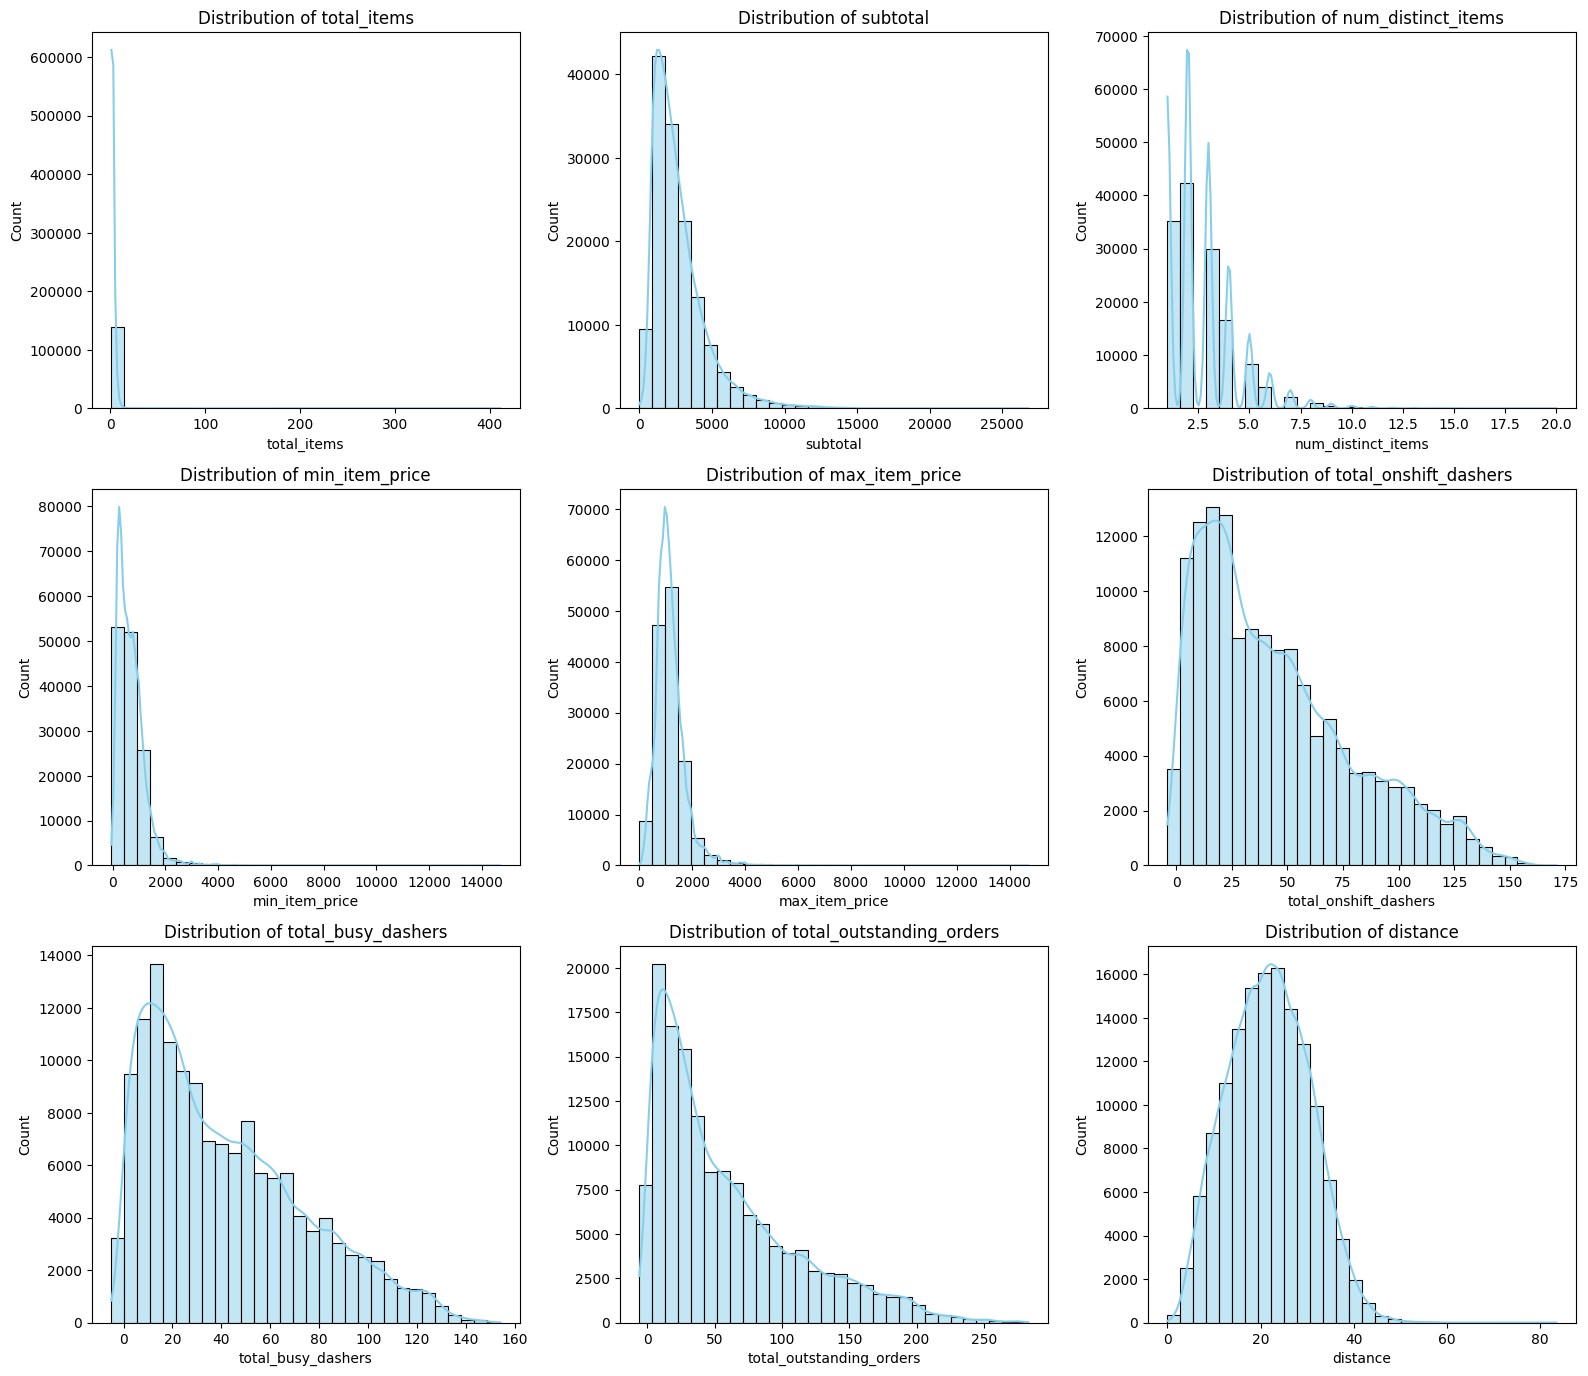

In [167]:
num_col = ['total_items', 'subtotal', 'num_distinct_items',
                  'min_item_price', 'max_item_price',
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
                  'distance']

plt.figure(figsize=(16, 18))
for i, col in enumerate(num_col, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=X_train, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [168]:
df['store_primary_category'].unique()

array([ 4, 46, 36, 38, 58, 68, 15, 57, 55, 20, 60, 13, 45, 39, 34, 18, 29,
       23, 50, 70,  6,  7, 10, 28, 24, 61, 59, 72, 16, 65, 47, 53, 49, 40,
       66, 42, 21, 14, 35, 11, 52,  2, 71, 25, 54, 69, 26, 12, 32, 30, 17,
       33, 22, 31,  0, 51, 48, 67, 44, 62,  9, 27, 19,  1,  5, 41, 37, 64,
       56, 63, 43,  8,  3], dtype=int64)

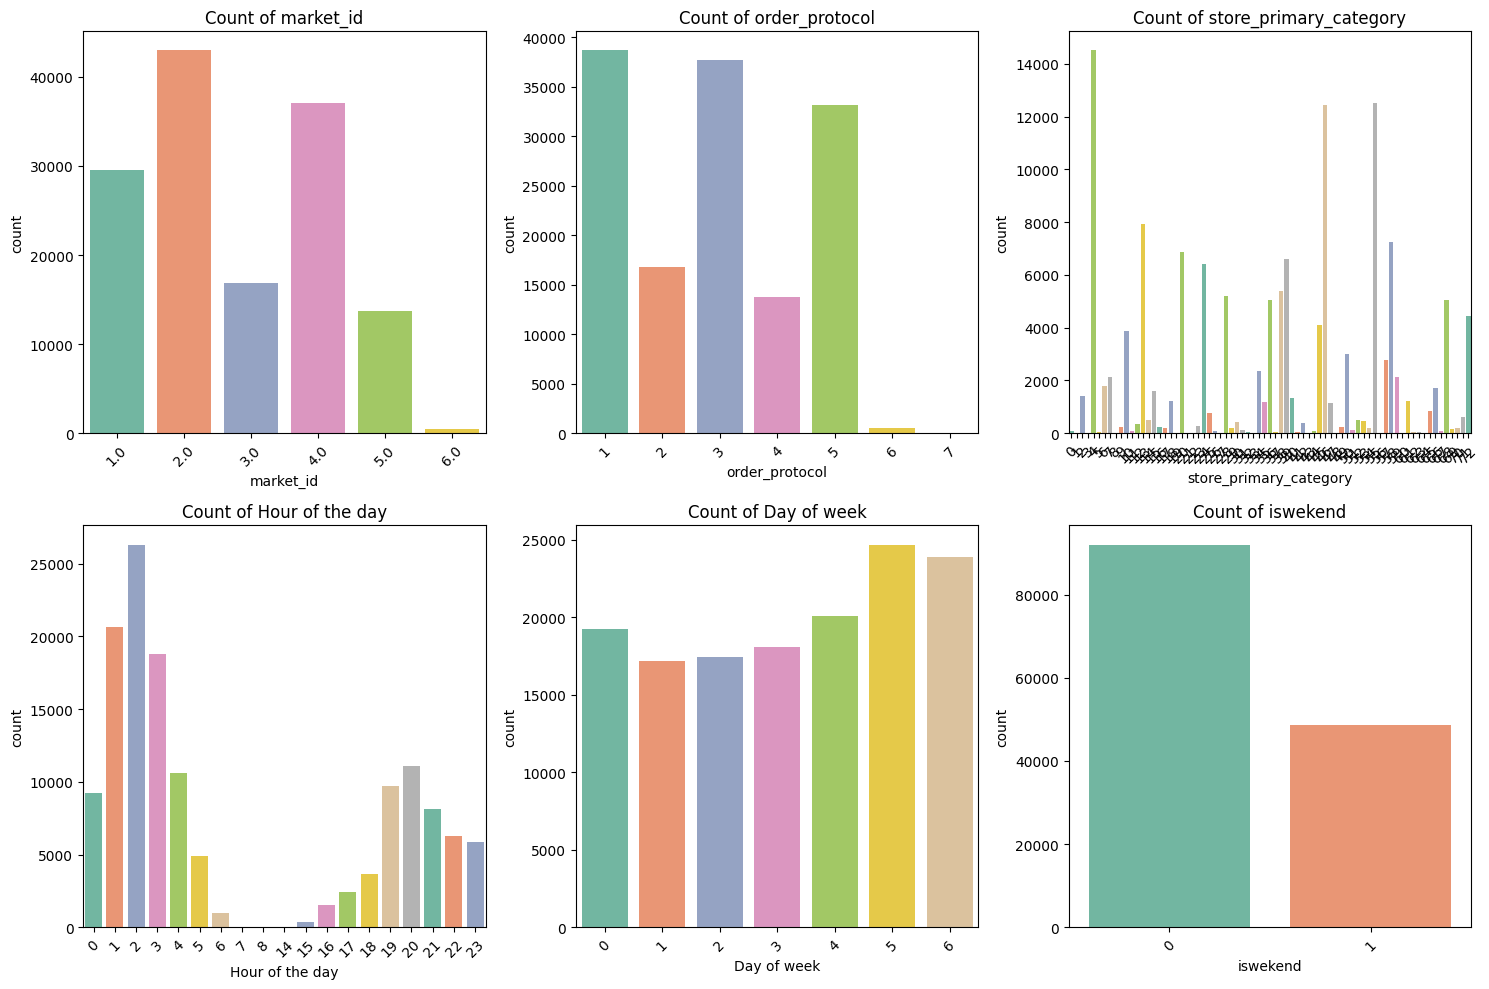

In [169]:
# Distribution of categorical columns

# Plot countplot for each categorical column
# Example with 5 columns
n_cols = 3  # number of plots per row
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # calculates how many rows you'll need

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=X_train, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

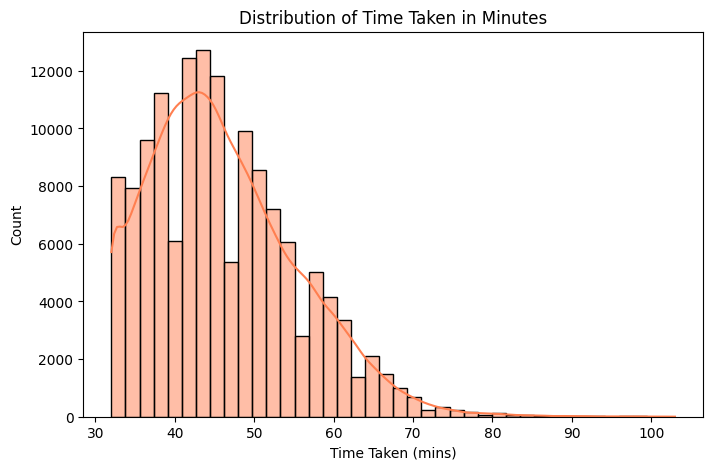

In [170]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))
sns.histplot(data=y_train, kde=True, bins=40, color='coral')
plt.title('Distribution of Time Taken in Minutes')
plt.xlabel('Time Taken (mins)')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [171]:
# Lets go with distance, subtotal, total_items, total_onshift_dashers, total_outstanding_orders
req_cols = ['distance', 'subtotal', 'total_items', 'total_onshift_dashers', 'total_outstanding_orders']
req_cols

['distance',
 'subtotal',
 'total_items',
 'total_onshift_dashers',
 'total_outstanding_orders']

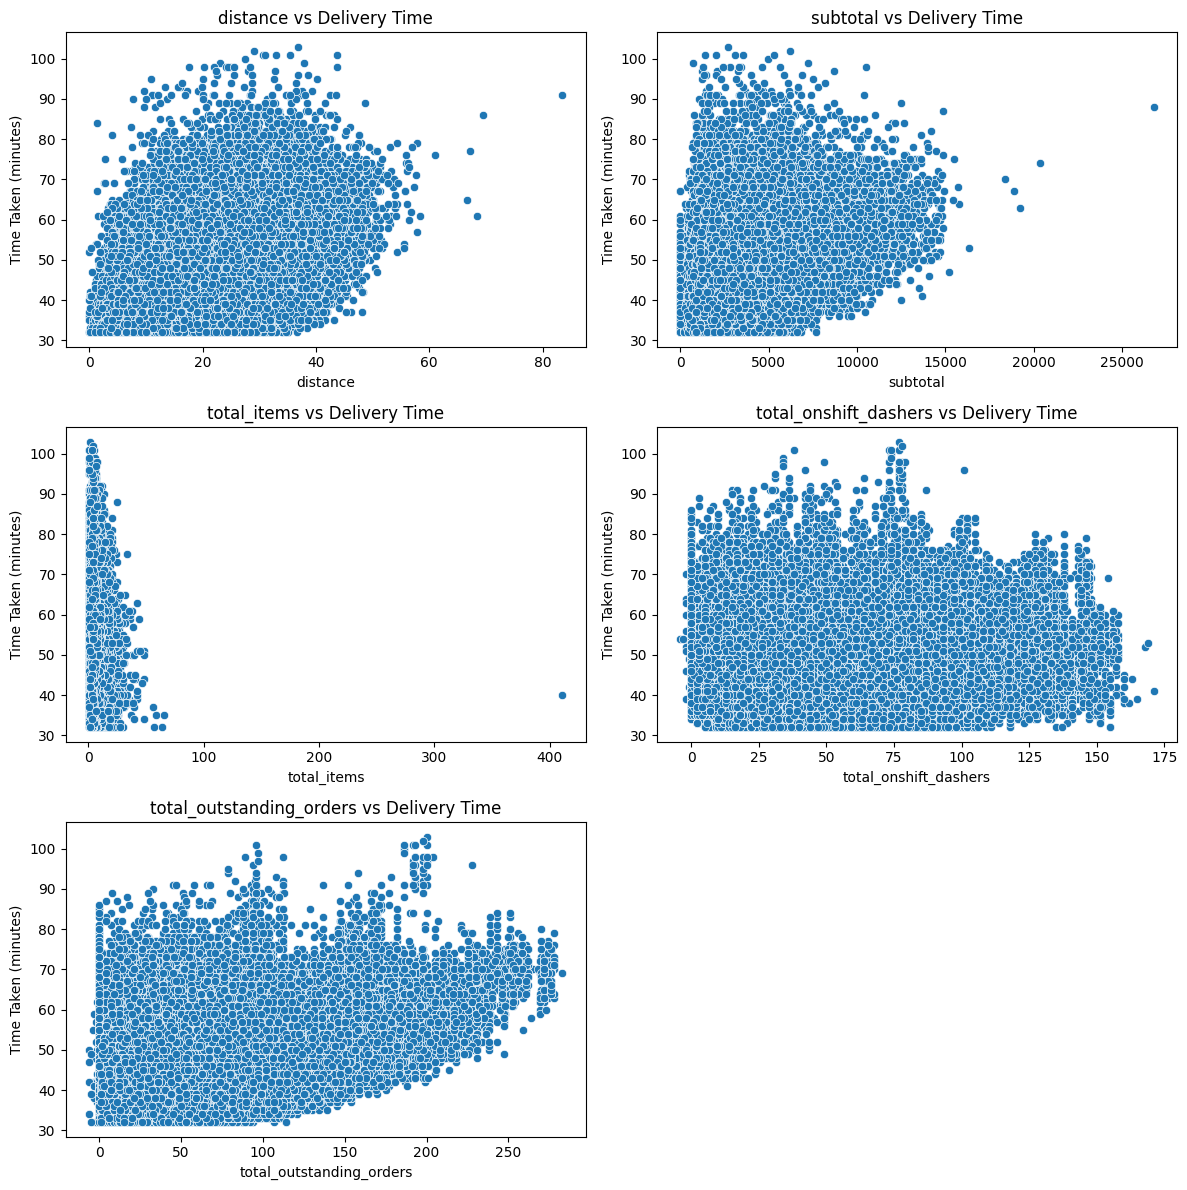

In [172]:
import math

n_cols = len(req_cols)
n_rows = math.ceil(n_cols / 2)  # You can change 2 to another value for more columns per row

plt.figure(figsize=(12, n_rows * 4))  # Adjust height accordingly

for i, col in enumerate(req_cols, 1):
    plt.subplot(n_rows, 2, i)
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'{col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()


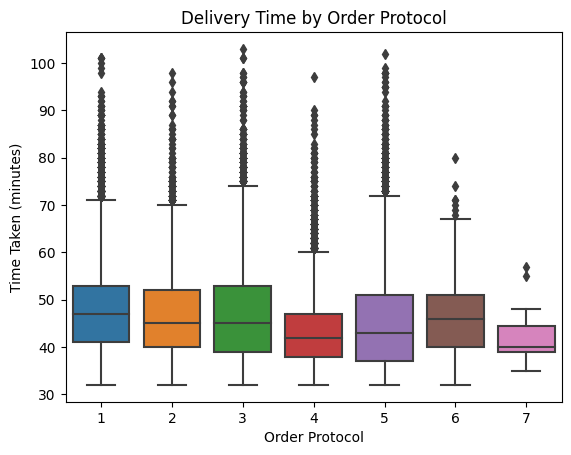

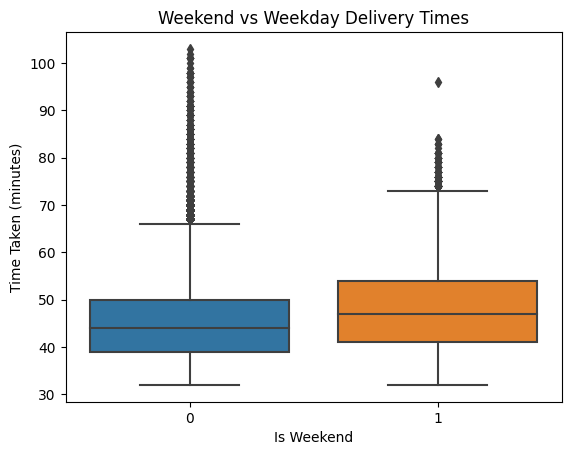

In [173]:
# Delivery time by order protocol
sns.boxplot(x=X_train['order_protocol'], y=y_train)
plt.title('Delivery Time by Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Time Taken (minutes)')
plt.show()

# Delivery time by iswekend
sns.boxplot(x=X_train['iswekend'], y=y_train)
plt.title('Weekend vs Weekday Delivery Times')
plt.xlabel('Is Weekend')
plt.ylabel('Time Taken (minutes)')
plt.show()


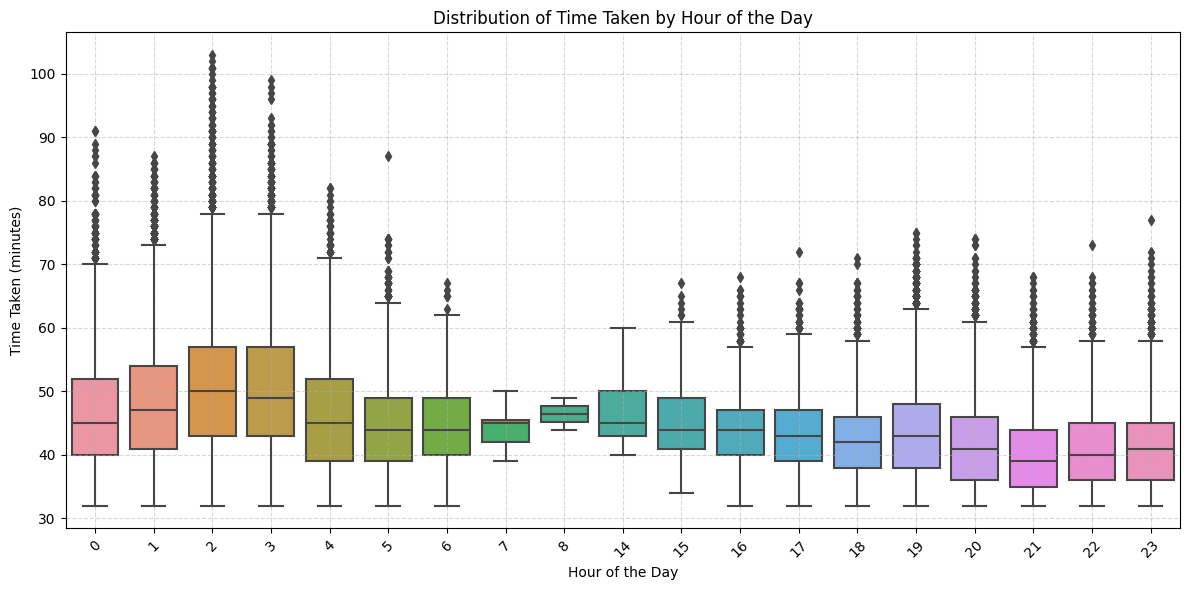

In [174]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['Hour of the day'], y=y_train)
plt.title('Distribution of Time Taken by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

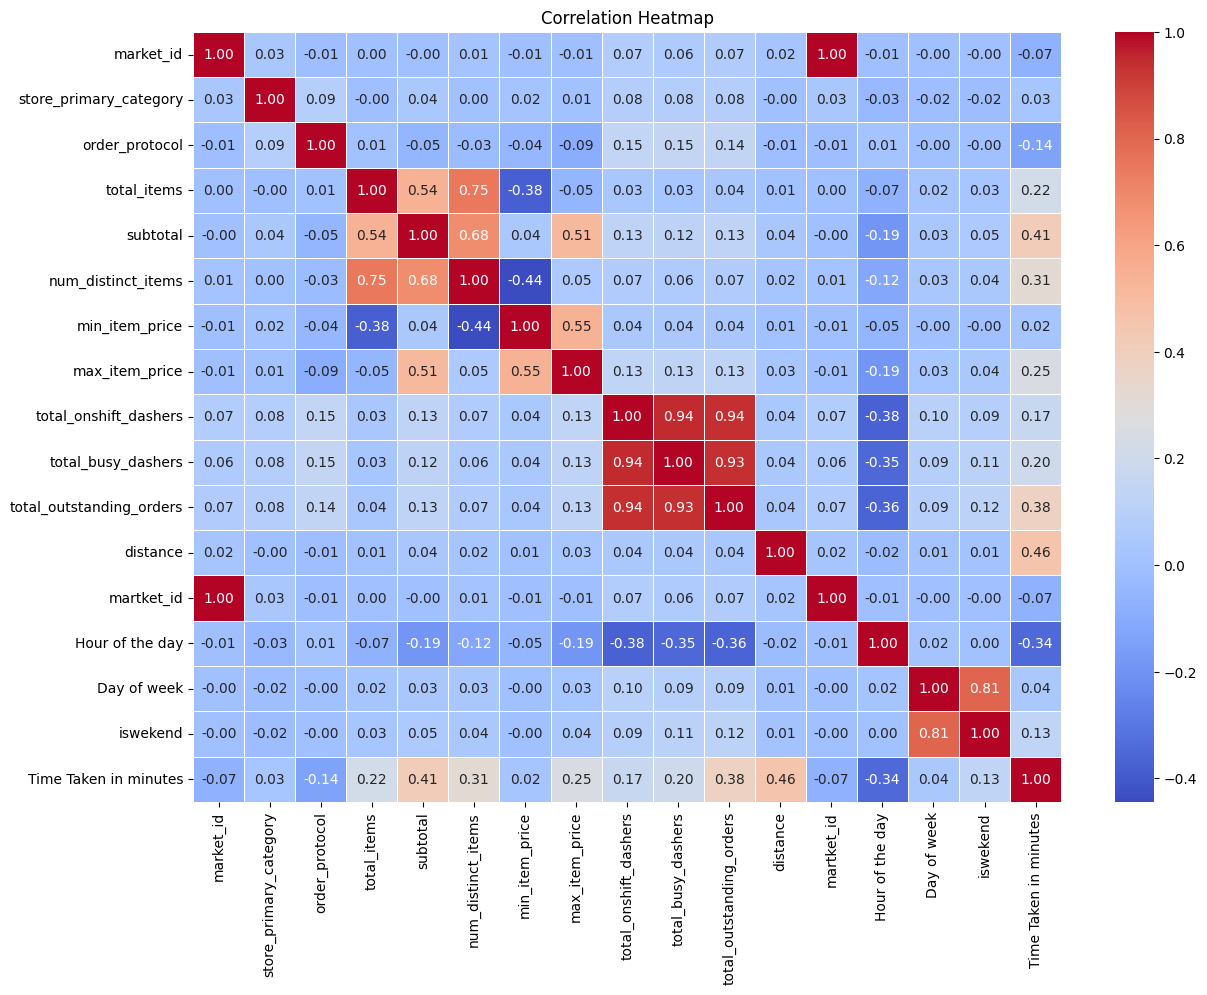

In [175]:
# Plot the heatmap of the correlation matrix
train_df = X_train.copy()
train_df['Time Taken in minutes'] = y_train

# Compute correlation matrix
corr_matrix = train_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [176]:
X_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'martket_id', 'Hour of the day',
       'Day of week', 'iswekend'],
      dtype='object')

In [177]:
X_test.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'martket_id', 'Hour of the day',
       'Day of week', 'iswekend'],
      dtype='object')

In [178]:
# Drop 3-5 weakly correlated columns from training dataset
X_train.drop(columns=['min_item_price', 'max_item_price', 'num_distinct_items'], inplace=True)
X_test.drop(columns=['min_item_price', 'max_item_price', 'num_distinct_items'], inplace=True)

In [179]:
X_train.columns, X_test.columns

(Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
        'subtotal', 'total_onshift_dashers', 'total_busy_dashers',
        'total_outstanding_orders', 'distance', 'martket_id', 'Hour of the day',
        'Day of week', 'iswekend'],
       dtype='object'),
 Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
        'subtotal', 'total_onshift_dashers', 'total_busy_dashers',
        'total_outstanding_orders', 'distance', 'martket_id', 'Hour of the day',
        'Day of week', 'iswekend'],
       dtype='object'))

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

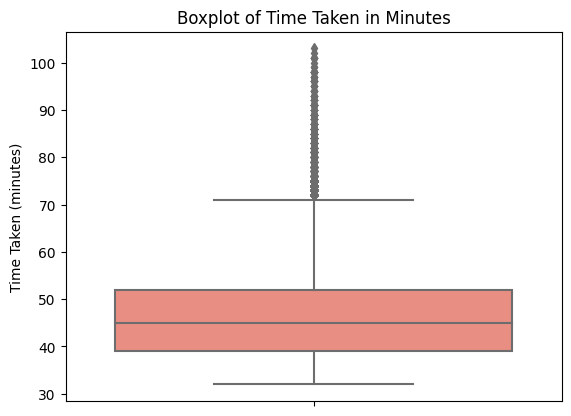

In [180]:
# Boxplot for time_taken
sns.boxplot(y=y_train, color='salmon')
plt.title('Boxplot of Time Taken in Minutes')
plt.ylabel('Time Taken (minutes)')
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [181]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1

39.0

In [182]:
# Handle outliers

# Define thresholds using IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within bounds
mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train = X_train[mask]
y_train = y_train[mask]



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [183]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [184]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [185]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [186]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [187]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [188]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [189]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [190]:
X_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'martket_id', 'Hour of the day',
       'Day of week', 'iswekend'],
      dtype='object')

In [192]:
# Apply scaling to the numerical columns

scale_cols = ['subtotal', 'total_items',
              'total_onshift_dashers', 'total_busy_dashers',
              'total_outstanding_orders', 'distance',
              'Hour of the day', 'Day of week']

# Create scaler and apply on training data
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [193]:
# Create/Initialise the model
lr_model = LinearRegression()

In [194]:
# Train the model using the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [195]:
# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [196]:
# Find results for evaluation metrics
print("Training Set Metrics:")
print("R² Score:", r2_score(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))


Training Set Metrics:
R² Score: 0.8803521913021973
MAE: 2.281677384183654
RMSE: 3.0429708908332844


In [197]:
print("\nTest Set Metrics:")
print("R² Score:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))


Test Set Metrics:
R² Score: 0.879044941541431
MAE: 2.3473738414088263
RMSE: 3.2490438102843067


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [198]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

for k in range(5, X_train.shape[1] + 1):  # from 5 to total features
    rfe = RFE(estimator=lr, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{k} Features | R² Score: {score:.4f}")

5 Features | R² Score: 0.8068
6 Features | R² Score: 0.8552
7 Features | R² Score: 0.8600
8 Features | R² Score: 0.8710
9 Features | R² Score: 0.8784
10 Features | R² Score: 0.8784
11 Features | R² Score: 0.8788
12 Features | R² Score: 0.8789
13 Features | R² Score: 0.8790


In [199]:
# Build the final model with selected number of features
rfe = RFE(estimator=lr, n_features_to_select=8)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:\n", selected_features)

X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

lr.fit(X_train_rfe, y_train)
y_pred_rfe = lr.predict(X_test_rfe)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("\nFinal Model with Top Features:")
print("R² Score:", r2_score(y_test, y_pred_rfe))
print("MAE:", mean_absolute_error(y_test, y_pred_rfe))
print("RMSE:", mean_squared_error(y_test, y_pred_rfe, squared=False))

Selected Features:
 Index(['order_protocol', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'Hour of the day', 'iswekend'],
      dtype='object')

Final Model with Top Features:
R² Score: 0.8710245620638181
MAE: 2.391475023723621
RMSE: 3.3550350004627645


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

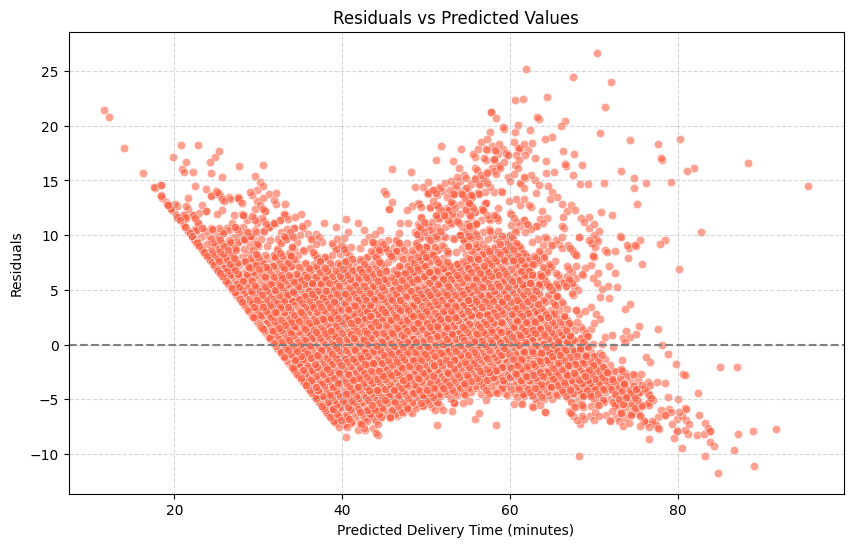

In [200]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals, color='tomato', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Time (minutes)')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

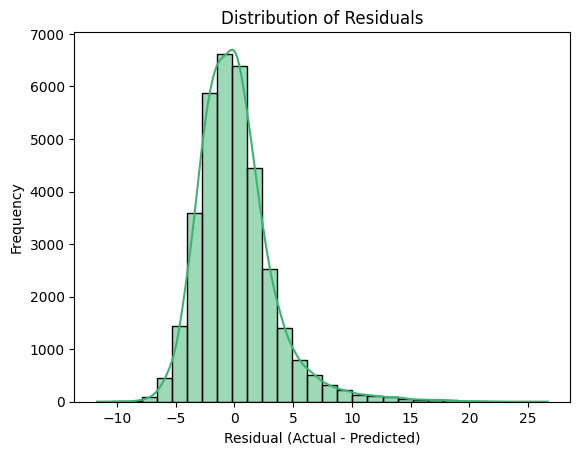

In [201]:
sns.histplot(residuals, kde=True, bins=30, color='mediumseagreen')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


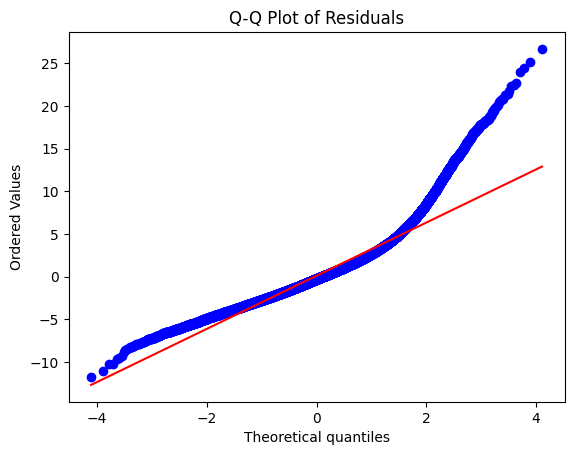

In [202]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [203]:
# Compare the scaled vs unscaled features used in the final model
# Combine feature names with model coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)



                     Feature   Coefficient
0                  market_id -1.765125e+11
9                 martket_id  1.765125e+11
7   total_outstanding_orders  1.758183e+01
5      total_onshift_dashers -1.202499e+01
6         total_busy_dashers -4.452783e+00
8                   distance  4.098800e+00
4                   subtotal  2.813421e+00
10           Hour of the day -2.121474e+00
12                  iswekend  1.466304e+00
2             order_protocol -6.961343e-01
3                total_items  1.863725e-01
11               Day of week -2.955532e-02
1     store_primary_category  4.302979e-03


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
X_train.columns

In [204]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# Example: How much does 1 additional item affect delivery time?
original_std = df['total_items'].std()
impact = lr_model.coef_[X_train.columns.get_loc('total_items')] * original_std
print(f"Estimated effect of one more item: {impact:.2f} minutes")



Estimated effect of one more item: 0.50 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, there are categorical variables in the dataset. The main ones identified during exploratory analysis are:
> Order_protocol
> store_primary_category
> iswekend

From the analysis:

Order protocols showed differences in delivery times, likely due to how the orders are processed.

Store categories (e.g., fast food vs. fine dining) influence prep time and thus affect delivery duration.

Weekend orders tend to take longer due to higher demand or limited delivery availability.

These categorical variables, after encoding, contribute meaningfully to predicting delivery time.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> Test_size = 0.2 means that 20% of the data will be used as the test set, and the remaining 80% will be used for training the model. It controls the proportion of data reserved for evaluating model performance on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> distance with	0.46, is highly correlated



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> We used the Interquartile Range (IQR) method to detect outliers. Any data points below Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR were considered outliers and removed from the dataset.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> If we take the abosulte values

total_busy_dashers (|−1.173| → Highest impact, negative)

total_outstanding_orders (|1.143| → Second highest, positive)

distance (|0.562| → Third highest, positive)
These are the top 3 features significantly affecting the delivery time



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> 
Linear Regression is one of the simplest and most widely used algorithms in statistics and machine learning. It is used to model the relationship between a dependent variable (target) and one or more independent variables (features or predictors).

**Objective**

    To model a linear relationship between:
    
    Independent variables (X)
    
    Dependent variable (Y)
    
    The goal is to predict the value of Y given new values of X.

**Equation**

>Y = b₀ + b₁X

    Y = Target (dependent variable)
    X = Feature
    b₀ = Intercept (bias)
    b₁ = Coefficients
    ϵ = Error Term

The algorithm finds the line that best fits the data, The best-fit line is calculated by minimizing the Residual Sum of Squares (RSS) — the sum of squared differences between the observed and predicted values.

**Advantages**
    Simple and easy to implement
    
    Highly interpretable
    
    Efficient with small to moderately sized datasets

**Limitations**

    Assumes linearity — not suitable for nonlinear problems
    
    Sensitive to outliers
    
    Poor performance with multicollinearity
    
    Doesn’t handle categorical variables unless encoded



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Difference Between Simple and Multiple Linear Regression

| Feature                      | Simple Linear Regression                          | Multiple Linear Regression                                 |
|-----------------------------|----------------------------------------------------|------------------------------------------------------------|
| **Number of Independent Variables** | 1                                                  | 2 or more                                                  |
| **Equation**                 | Y = b₀ + b₁X₁                                      | Y = b₀ + b₁X₁ + b₂X₂ + ... + bₙXₙ                          |
| **Visual Representation**    | Straight line in 2D space                          | Plane or hyperplane in higher dimensions                   |
| **Use Case Example**         | Predicting delivery time using only distance       | Predicting delivery time using distance, items, and hour   |
| **Complexity**               | Very simple and easy to interpret                  | More complex but gives a better model with more variables  |
| **Accuracy (usually)**       | Lower, since it uses limited information           | Higher, as it considers more factors                       |

>Use Simple Linear Regression when you have only one feature, and Multiple when you want to use many features to make better predictions.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>

#### Role of the Cost Function in Linear Regression

#### What is the Cost Function?

The **cost function** measures how well the linear regression model is performing. It calculates the **error** between the predicted values and the actual values.

**Common Cost Function**: **Mean Squared Error (MSE)**  

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
---

#### How is it Minimized?

To find the best-fitting line, we minimize the cost function using an optimization algorithm like:

**🔹 Gradient Descent**

Steps:
1. Initialize weights (θ) randomly.
2. Calculate the gradient (partial derivatives of cost w.r.t. each parameter).
3. Update weights in the opposite direction of the gradient.
4. Repeat until convergence (cost becomes minimum).

**Update Rule**:

$$
\theta_{t+1} = \theta_t - \eta \cdot \nabla J(\theta_t)
$$

#### Goal:
To find the line (model parameters) that minimizes the total error, so that predictions are as close as possible to the actual values.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting happens when a model learns the training data too well, including its noise and outliers. It performs well on training data but poorly on unseen data, meaning it doesn’t generalize well.

>Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and test sets, indicating that it hasn’t learned enough from the data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> 1. Linearity Check

Plot: Residuals vs. Predicted

What to Look For: Random scatter = good. Curves = model misses non-linear trends.

Solution: Add polynomial terms or transform variables.

>2. Heteroscedasticity (Unequal Variance)

Plot: Residuals vs. Predicted

What to Look For: Cone/funnel-shaped spread.

Solution: Transform target (e.g., log) or use weighted regression.

>3. Normality of Errors

Plot: Q-Q Plot

What to Look For: Points on a straight line = normally distributed errors.

Solution: Apply transformations or address outliers.

>4. Outlier Detection

Plot: Residuals vs. Features

What to Look For: Points beyond ±3 std. deviations.

Solution: Investigate anomalies or use robust models.

>5. Autocorrelation (Time-Based Data)

Plot: Residuals vs. Time

What to Look For: Repeating patterns or waves.

Solution: Add time lags or switch to time series models like ARIMA.